#  <span style='color:blue'> 러시아·우크라이나 전쟁이 우리나라 경제에 미친 영향 분석   </span> 

### <span style='color:Blue'> <주  제> 전쟁으로 인한 우리나라 금리, 물가, 환율, 임금, 취업, 실업의 변화 및 관계 분석</span>

- 인플레이션 : 화폐가치가 하락하여 물가가 전반적, 지속적으로 상승하는 경제현상  ->  소비자물가지수

- 기대인플레이션율 : 기업 및 가계 등의 경제 주체들이 현재 알고있는 정보를 바탕으로 예상하는 미래의 물가상승률

### 자료 출처

- 한국은행 경제통계시스템

    - 기준금리, 소비자물가지수, 달러환율, 임금, 기대인플레이션율
    
- KOSIS 국가통계포털

    - 취업률과 고용률

##### 예상   
- 전쟁으로 인해 기준금리와 소비자물가지수, 환율은 오를 것이므로 이에 따라 인플레이션이 일어날 것이라고 생각했습니다. (이유? 러시아와 우크라이나 의존도가 큰 자원들(천연가스, 원유, 팔라듐, 니켈, 밀, 보리, 옥수수 등) 수입이 막히게 되었습니다.)
- 인플레이션으로 인한 임금, 취업, 실업률의 관계에 대하여 알아보았습니다.(이유? 금리를 올리면 원자재 상승, 임금인상으로 이자부담이 늘어나는 기업은 부채가 부실해지고 위험해져 임금이 줄어들고 취업률도 줄어들고 실업률이 늘어날 것이라고 생각되기 때문입니다.)

## 데이터 전처리

In [37]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import platform

plt.style.use('ggplot')
if platform.system()=='Windows':
    plt.rc('font',family='Malgun Gothic')
else:
    plt.rc('font',family='AppleGothic')

# 파일명 지정
FILE1='기준금리.csv'
FILE2='소비자물가지수.csv'
FILE3='환율.csv'
FILE4='임금.csv'
FILE5='기대인플레이션율.csv'
FILE6='실업률과고용률.csv'

In [38]:
# 파일 로딩
df1=pd.read_csv(FILE1)
df2=pd.read_csv(FILE2)
df3=pd.read_csv(FILE3)
df4=pd.read_csv(FILE4)
df5=pd.read_csv(FILE5)
df6=pd.read_csv(FILE6, encoding='euc_kr')

In [39]:
# 컬럼명을 원하는 날짜로 맞추기 위해 생성
month=pd.date_range('2019-01','2022-06', freq='MS')
month=month.to_period('m')

In [40]:
# 기준금리 컬럼 데이터 전처리
df1.index=['기준금리(연%)']
df1.drop(['통계표','계정항목','변환','단위'],axis=1,inplace=True)
df1.columns=month
df1

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
기준금리(연%),1.75,1.75,1.75,1.75,1.75,1.75,1.5,1.5,1.5,1.25,...,0.75,0.75,1.0,1.0,1.25,1.25,1.25,1.5,1.75,1.75


In [41]:
# 소비자물가지수 컬럼 데이터 전처리
df2.index=['소비자물가지수(2020=100)']
df2.drop(['통계표','계정항목','단위','가중치','변환'],axis=1,inplace=True)
df2.columns=month
df2

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
소비자물가지수(2020=100),98.884,99.311,99.121,99.481,99.652,99.491,99.187,99.425,99.794,100.041,...,103.17,103.35,103.87,104.04,104.69,105.3,106.06,106.85,107.56,108.22


In [42]:
# 환율 컬럼 데이터 전처리
df3.index=['달러환율(원)']
df3.drop(['통계표','계정항목','변환','측정항목','단위'],axis=1,inplace=True)
df3.columns=month
df3

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
달러환율(원),"1,122.00","1,122.45","1,130.72","1,140.95","1,183.29","1,175.62","1,175.31","1,208.98","1,197.55","1,184.13",...,"1,169.54","1,182.82","1,182.91","1,183.70","1,194.01","1,198.34","1,221.03","1,232.34","1,269.88","1,277.35"


In [43]:
# 임금 컬럼 데이터 전처리 2020/04 ~ 2022/04
df4.index=['임금(원)']
df4.drop(['통계표','계정항목','구분코드','변환','규모코드','단위'],axis=1,inplace=True)
df4.columns=month[12:-2]
df4

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04
임금(원),"4,091,969","3,403,361","3,473,131","3,358,565","3,287,099","3,351,376","3,526,470","3,378,692","3,815,583","3,333,568",...,"3,769,134","3,521,416","3,961,463","3,455,238","3,429,543","4,304,510","4,721,940","3,694,897","3,836,748","3,579,506"


In [44]:
# 기대인플레이션율 데이터 전처리
df5.index=['기대인플레이션율(%)']
df5.drop(['통계표','CSI코드','변환','단위'],axis=1,inplace=True)
df5.columns=month
df5

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
기대인플레이션율(%),2.3,2.3,2.3,2.1,2.2,2.1,2.1,2.0,1.8,1.7,...,2.4,2.4,2.7,2.6,2.6,2.7,2.9,3.1,3.3,3.9


In [45]:
# 고용률 컬럼 데이터 전처리
df7=df6.T
df7=df7[[0,1]][df7[0]=='고용률 (%)']
df7.index=month
df7=df7.drop(0, axis=1)
df7.columns=['고용률(%)']
df7=df7.T
df7

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
고용률(%),59.2,59.4,60.4,60.8,61.5,61.6,61.5,61.4,61.5,61.7,...,61.3,61.4,61.5,60.4,59.6,60.6,61.4,62.1,63.0,62.9


In [46]:
# 실업률 컬럼 데이터 전처리
df8=df6.T
df8=df8[[0,1]][df8[0]=='실업률 (%)']
df8.index=month
df8=df8.drop(0, axis=1)
df8.columns=['실업률(%)']
df8=df8.T
df8

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
실업률(%),4.5,4.7,4.3,4.4,4.0,4.0,3.9,3.0,3.1,3.0,...,2.7,2.8,2.6,3.5,4.1,3.4,3.0,3.0,3.0,3.0


## 데이터 병합 후 형 변환

In [47]:
# 날짜 맞춰서 하나의 데이터프레임으로 만들기
df=pd.concat([df1,df2,df3,df4,df7,df8,df5],axis=0)
df.columns=df.columns.astype('str')
df

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
기준금리(연%),1.75,1.75,1.75,1.75,1.75,1.75,1.5,1.5,1.5,1.25,...,0.75,0.75,1.0,1.0,1.25,1.25,1.25,1.5,1.75,1.75
소비자물가지수(2020=100),98.884,99.311,99.121,99.481,99.652,99.491,99.187,99.425,99.794,100.041,...,103.17,103.35,103.87,104.04,104.69,105.3,106.06,106.85,107.56,108.22
달러환율(원),"1,122.00","1,122.45","1,130.72","1,140.95","1,183.29","1,175.62","1,175.31","1,208.98","1,197.55","1,184.13",...,"1,169.54","1,182.82","1,182.91","1,183.70","1,194.01","1,198.34","1,221.03","1,232.34","1,269.88","1,277.35"
임금(원),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"3,961,463","3,455,238","3,429,543","4,304,510","4,721,940","3,694,897","3,836,748","3,579,506",NaN,NaN
고용률(%),59.2,59.4,60.4,60.8,61.5,61.6,61.5,61.4,61.5,61.7,...,61.3,61.4,61.5,60.4,59.6,60.6,61.4,62.1,63.0,62.9
실업률(%),4.5,4.7,4.3,4.4,4.0,4.0,3.9,3.0,3.1,3.0,...,2.7,2.8,2.6,3.5,4.1,3.4,3.0,3.0,3.0,3.0
기대인플레이션율(%),2.3,2.3,2.3,2.1,2.2,2.1,2.1,2.0,1.8,1.7,...,2.4,2.4,2.7,2.6,2.6,2.7,2.9,3.1,3.3,3.9


In [48]:
# 타입 확인
df.dtypes

2019-01    object
2019-02    object
2019-03    object
2019-04    object
2019-05    object
2019-06    object
2019-07    object
2019-08    object
2019-09    object
2019-10    object
2019-11    object
2019-12    object
2020-01    object
2020-02    object
2020-03    object
2020-04    object
2020-05    object
2020-06    object
2020-07    object
2020-08    object
2020-09    object
2020-10    object
2020-11    object
2020-12    object
2021-01    object
2021-02    object
2021-03    object
2021-04    object
2021-05    object
2021-06    object
2021-07    object
2021-08    object
2021-09    object
2021-10    object
2021-11    object
2021-12    object
2022-01    object
2022-02    object
2022-03    object
2022-04    object
2022-05    object
2022-06    object
dtype: object

In [49]:
# ',' 제거하고 object -> 실수형으로 변환
df=df.replace(',','', regex=True)
df=df.astype('float64')
df.dtypes

2019-01    float64
2019-02    float64
2019-03    float64
2019-04    float64
2019-05    float64
2019-06    float64
2019-07    float64
2019-08    float64
2019-09    float64
2019-10    float64
2019-11    float64
2019-12    float64
2020-01    float64
2020-02    float64
2020-03    float64
2020-04    float64
2020-05    float64
2020-06    float64
2020-07    float64
2020-08    float64
2020-09    float64
2020-10    float64
2020-11    float64
2020-12    float64
2021-01    float64
2021-02    float64
2021-03    float64
2021-04    float64
2021-05    float64
2021-06    float64
2021-07    float64
2021-08    float64
2021-09    float64
2021-10    float64
2021-11    float64
2021-12    float64
2022-01    float64
2022-02    float64
2022-03    float64
2022-04    float64
2022-05    float64
2022-06    float64
dtype: object

In [50]:
# 행<=>열 전치
df=df.T
df

,기준금리(연%),소비자물가지수(2020=100),달러환율(원),임금(원),고용률(%),실업률(%),기대인플레이션율(%)
2019-01,1.75,98.884,1122.00,NaN,59.2,4.5,2.3
2019-02,1.75,99.311,1122.45,NaN,59.4,4.7,2.3
2019-03,1.75,99.121,1130.72,NaN,60.4,4.3,2.3
2019-04,1.75,99.481,1140.95,NaN,60.8,4.4,2.1
2019-05,1.75,99.652,1183.29,NaN,61.5,4.0,2.2
2019-06,1.75,99.491,1175.62,NaN,61.6,4.0,2.1
2019-07,1.50,99.187,1175.31,NaN,61.5,3.9,2.1
2019-08,1.50,99.425,1208.98,NaN,61.4,3.0,2.0
2019-09,1.50,99.794,1197.55,NaN,61.5,3.1,1.8
2019-10,1.25,100.041,1184.13,NaN,61.7,3.0,1.7


# -----------------------------------------------------------------

## 전체기간 알아보기 2019-01 ~ 2022-06

### 컬럼별 값에 대한 각각의 그래프 그리기

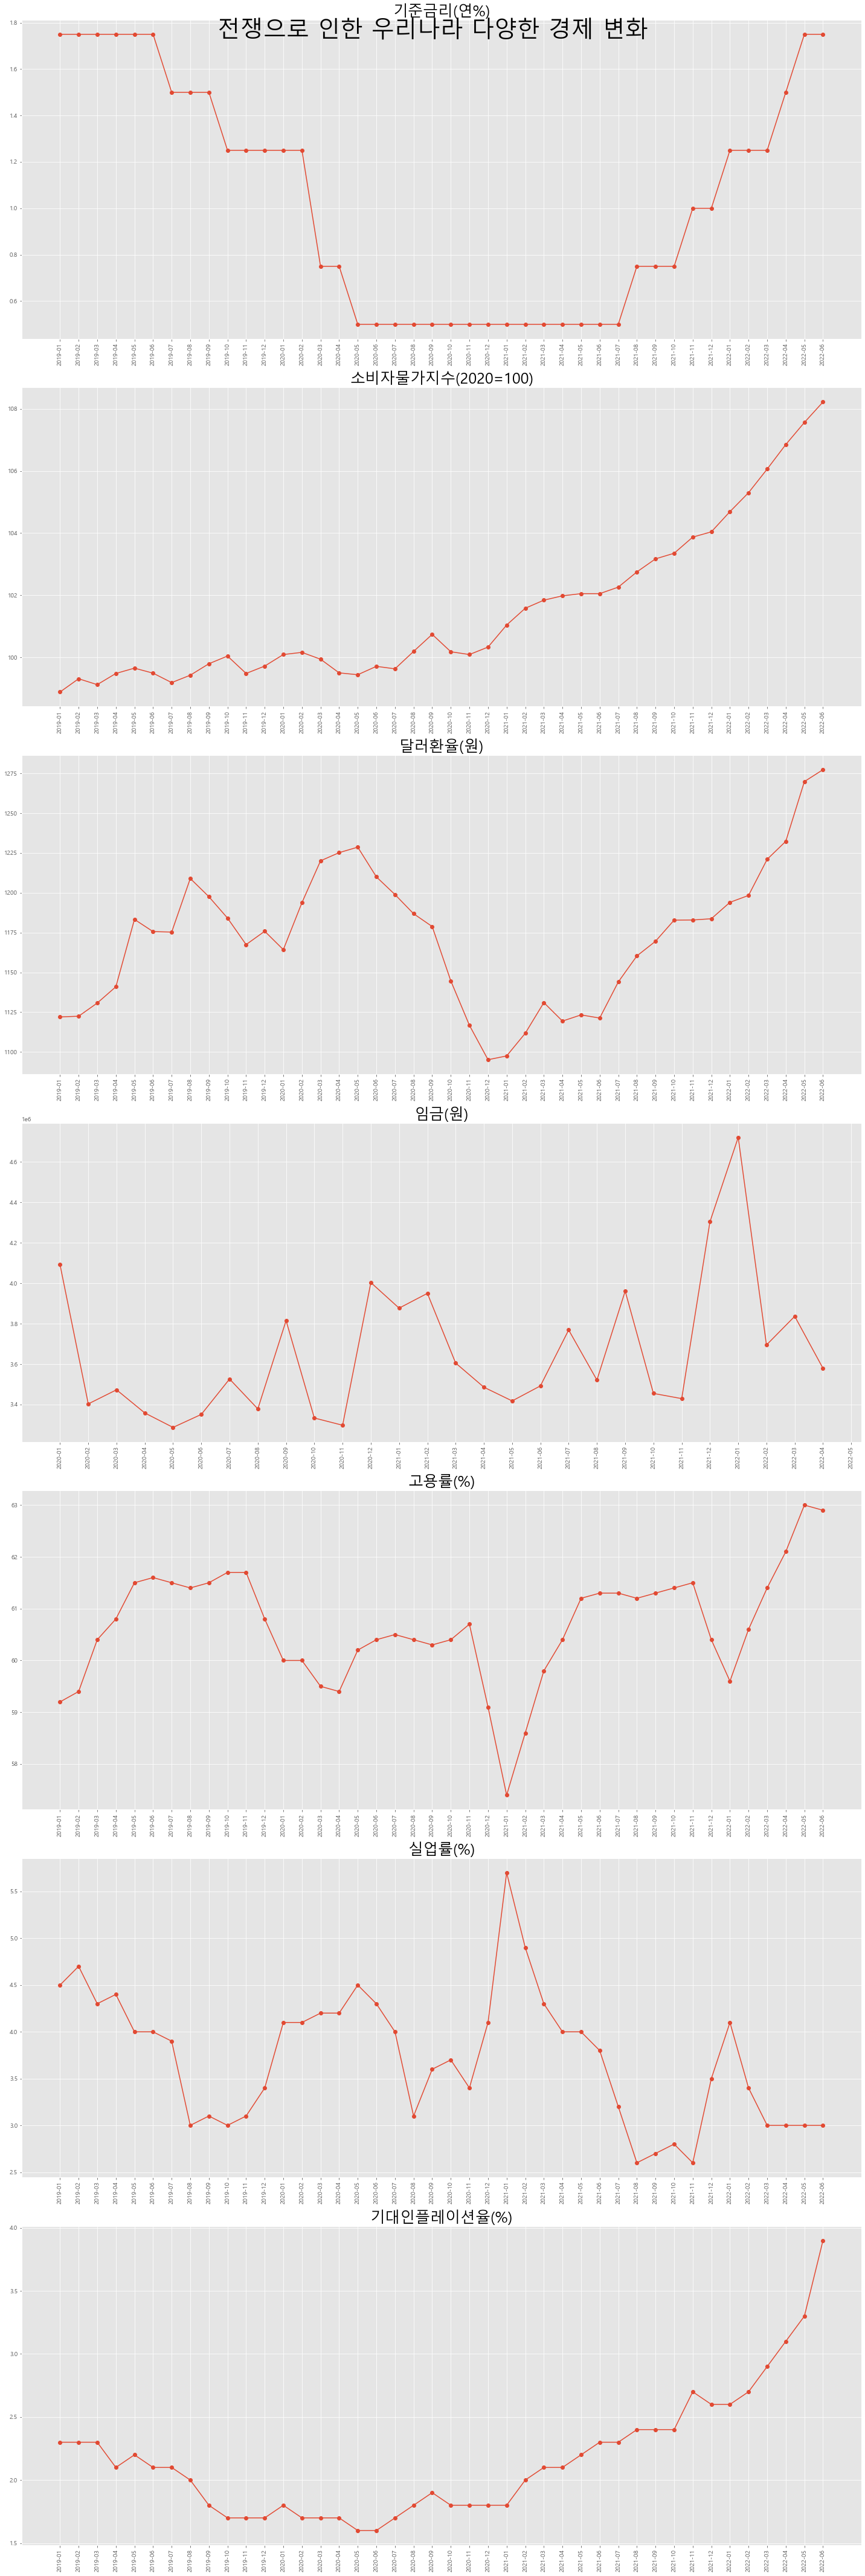

In [51]:
# 컬럼별 값에 대한 각각의 그래프 그리기
fig, axes=plt.subplots(7, 1, figsize=(20,60))
fig.suptitle('전쟁으로 인한 우리나라 다양한 경제 변화', fontsize=38 )

plt.subplot(7, 1, 1)  # 기준금리
plt.title('기준금리(연%)',fontsize=25) 
plt.plot(df['기준금리(연%)'], marker='o')
plt.xticks(df.index, rotation=90)

plt.subplot(7, 1, 2) # 소비자물가지수
plt.title('소비자물가지수(2020=100)',fontsize=25)  
plt.plot(df['소비자물가지수(2020=100)'], marker='o')
plt.xticks(df.index, rotation=90)

plt.subplot(7, 1, 3) # 환율
plt.title('달러환율(원)',fontsize=25)  
plt.plot(df['달러환율(원)'], marker='o')
plt.xticks(df.index, rotation=90)

plt.subplot(7, 1, 4) # 임금
plt.title('임금(원)',fontsize=25)
plt.plot(df['임금(원)'], marker='o')  
plt.xticks(df.index[12:-1], rotation=90)

plt.subplot(7, 1, 5) #취업률
plt.title('고용률(%)',fontsize=25)
plt.plot(df['고용률(%)'], marker='o')  
plt.xticks(df.index, rotation=90)

plt.subplot(7, 1, 6) # 실업률
plt.title('실업률(%)',fontsize=25)
plt.plot(df['실업률(%)'], marker='o')  
plt.xticks(df.index, rotation=90)

plt.subplot(7, 1, 7) # 기대인플레이션율
plt.title('기대인플레이션율(%)',fontsize=25)
plt.plot(df['기대인플레이션율(%)'], marker='o')
plt.xticks(df.index, rotation=90)

plt.tight_layout()
plt.show()

## 증감 => 현재 달 데이터 / 이전 달 데이터

In [52]:
# 증감 데이터 리스트에 담기
b=[]
for col in df.columns:
    a=[]
    if df.iloc[0][col]!='nan':
        for i in range(len(df.index)-1):
            a.append(round(df.iloc[i+1][col]/df.iloc[i][col], 3))
        b.append(a)
    else:
        for i in range(12,40):
            a.append(round(df.iloc[i+1][col]/df.iloc[i][col], 3))
        b.append(a)

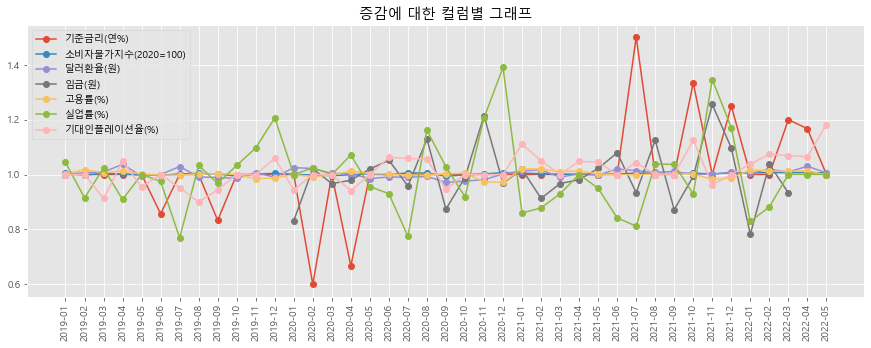

In [53]:
# 증감에 대한 그래프
b0=pd.Series(b[0])
b1=pd.Series(b[1])
b2=pd.Series(b[2])
b3=pd.Series(b[3])
b4=pd.Series(b[4])
b5=pd.Series(b[5])
b6=pd.Series(b[6])

df_nor2=pd.concat([b0,b1,b2,b3,b4,b5,b6],axis=1)
df_nor2.columns=df.columns

plt.figure(figsize=(15,5))
plt.title('증감에 대한 컬럼별 그래프')
for i in range(0,7):
    plt.plot(df.index[:-1],b[i], marker='o')
    plt.xticks(df.index[:-1], rotation=90)
    plt.legend(df_nor2.columns)
plt.show()

- 증감에 대한 경제 변화 : 기준 금리는 최근 일년간 급격히 상승하는 추세입니다.
- 기대인플레이션율은 러·우 전쟁을 기점으로 증가하였습니다.
- 나머지는 이 그래프를 보고 판단하기 어렵습니다.

### 정규화(1)   (컬럼의 데이터 - 평균) / 표준편차

In [54]:
# 정규화 데이터 리스트에 저장
d=[]
for col in df.columns:
    c=[]
    if df.iloc[0][col]!='nan':
        for i in range(len(df.index)):
            c.append(round((df.iloc[i][col] - df[col].mean()) / df[col].std(), 2))
        d.append(c)
        
    else:
        for i in range(12,41):
            c.append(round((df.iloc[i][col] - df[col].mean()) / df[col].std(), 2))
        d.append(c)

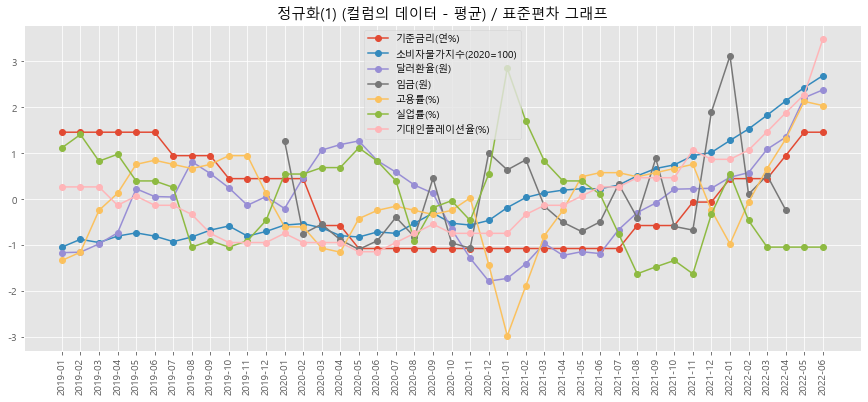

In [55]:
# 정규화 데이터 그래프 그리기
d0=pd.Series(d[0])
d1=pd.Series(d[1])
d2=pd.Series(d[2])
d3=pd.Series(d[3])
d4=pd.Series(d[4])
d5=pd.Series(d[5])
d6=pd.Series(d[6])

df_nor3=pd.concat([d0,d1,d2,d3,d4,d5,d6],axis=1)
df_nor3.columns=df.columns

plt.figure(figsize=(15,6))
plt.title('정규화(1) (컬럼의 데이터 - 평균) / 표준편차 그래프')
for i in range(0,7):
    plt.rcParams['axes.unicode_minus']=False
    plt.plot(df.index,d[i],marker='o')
    plt.xticks(df.index, rotation=90)
    plt.legend(df_nor3.columns)
plt.show()

- 3가지 방법으로 정규화를 한 후 종합적인 결과입니다.
- 기준금리, 소비자물가지수, 달러환율, 기대인플레이션율이 상승하고 있는 것을 알 수 있습니다.
- 전쟁 기간 임금, 실업률은 감소하는 추세인 것을 알 수 있습니다.

In [56]:
# 정규화 컬럼별 상관계수
df_nor3.corr()

,기준금리(연%),소비자물가지수(2020=100),달러환율(원),임금(원),고용률(%),실업률(%),기대인플레이션율(%)
기준금리(연%),1.000000,0.093035,0.324796,0.364815,0.394272,-0.112807,0.428092
소비자물가지수(2020=100),0.093035,1.000000,0.436655,0.393235,0.430459,-0.464060,0.877504
달러환율(원),0.324796,0.436655,1.000000,-0.114836,0.542235,-0.453382,0.384207
임금(원),0.364815,0.393235,-0.114836,1.000000,-0.281663,0.115235,0.349718
고용률(%),0.394272,0.430459,0.542235,-0.281663,1.000000,-0.786319,0.515873
실업률(%),-0.112807,-0.464060,-0.453382,0.115235,-0.786319,1.000000,-0.406167
기대인플레이션율(%),0.428092,0.877504,0.384207,0.349718,0.515873,-0.406167,1.000000


- 소비자물가지수와 기대인플레이션율은 강력한 양의 상관관계
- 고용률과 실업률은 강력한 음의 상관관계 가집니다.

##### 정규화 (2) (컬럼의 데이터 - 최소값) / (최대값 - 최소값 )

In [57]:
# 정규화 데이터 리스트에 저장
f=[]
for col in df.columns:
    e=[]
    if df.iloc[0][col]!='nan':
        for i in range(len(df.index)):
            e.append(round((df.iloc[i][col] - df[col].min()) / (df[col].max() - df[col].min()), 3))
        f.append(e)
        
    else:
        for i in range(12,41):
            e.append(round((df.iloc[i][col] - df[col].min()) / (df[col].max() - df[col].min()), 3))
        f.append(e)

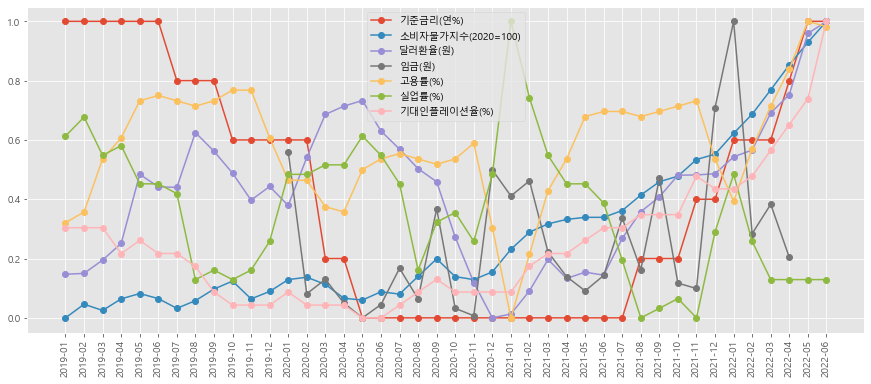

In [58]:
# 정규화 데이터 그래프 그리기
f0=pd.Series(f[0])
f1=pd.Series(f[1])
f2=pd.Series(f[2])
f3=pd.Series(f[3])
f4=pd.Series(f[4])
f5=pd.Series(f[5])
f6=pd.Series(f[6])

df_nor4=pd.concat([f0,f1,f2,f3,f4,f5,f6],axis=1)
df_nor4.columns=df.columns

plt.figure(figsize=(15,6))

for i in range(0,7):
    plt.plot(df.index,f[i], marker='o')
    plt.xticks(df.index, rotation=90)
    plt.legend(df_nor4.columns)
plt.show()

- 위의 정규화한 결과와 같이 임금, 실업률을 제외하고는 모두 상승하는 추세인 것을 알 수 있습니다.

In [59]:
# 정규화 컬럼별 상관계수
df_nor4.corr()

,기준금리(연%),소비자물가지수(2020=100),달러환율(원),임금(원),고용률(%),실업률(%),기대인플레이션율(%)
기준금리(연%),1.000000,0.092677,0.324908,0.364408,0.393815,-0.114050,0.427567
소비자물가지수(2020=100),0.092677,1.000000,0.436432,0.393103,0.429971,-0.463847,0.878034
달러환율(원),0.324908,0.436432,1.000000,-0.114105,0.542289,-0.453734,0.384438
임금(원),0.364408,0.393103,-0.114105,1.000000,-0.282325,0.114642,0.349723
고용률(%),0.393815,0.429971,0.542289,-0.282325,1.000000,-0.786094,0.515657
실업률(%),-0.114050,-0.463847,-0.453734,0.114642,-0.786094,1.000000,-0.407013
기대인플레이션율(%),0.427567,0.878034,0.384438,0.349723,0.515657,-0.407013,1.000000


- 마찬가지로 위의 정규화한 결과와 같이 소비자물가지수, 기대인플레이션율은 강력한 양의 상관관계
- 고용률과 실업률은 강력한 음의 상관관계를 가집니다.

##### 정규화(3)   컬럼의 데이터 / 최대값

In [60]:
# 정규화 데이터 리스트에 저장
h=[]
for col in df.columns:
    g=[]
    if df.iloc[0][col]!='nan':
        for i in range(len(df.index)):
            g.append(round(df.iloc[i][col] / df[col].max(), 3))
        h.append(g)
        
    else:
        for i in range(12,41):
            g.append(round(df.iloc[i][col] / df[col].max(), 3))
        h.append(g)

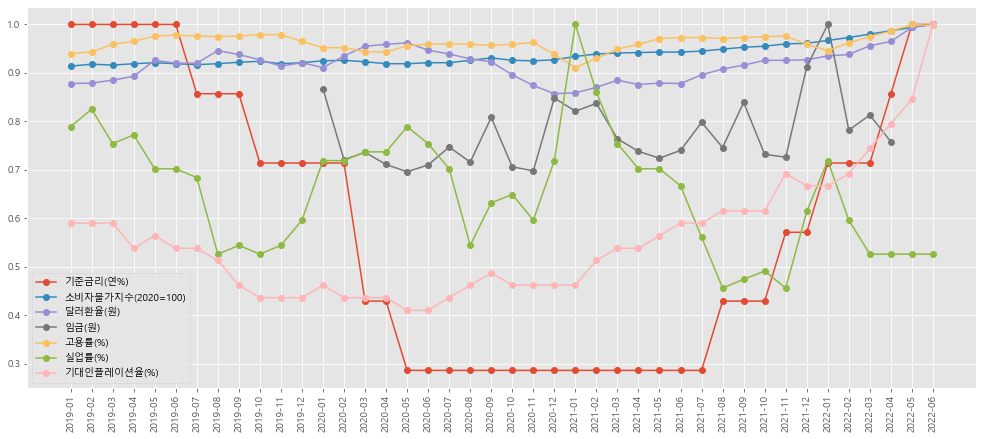

In [61]:
# 정규화 데이터 그래프 그리기
h0=pd.Series(h[0])
h1=pd.Series(h[1])
h2=pd.Series(h[2])
h3=pd.Series(h[3])
h4=pd.Series(h[4])
h5=pd.Series(h[5])
h6=pd.Series(h[6])

df_nor5=pd.concat([h0,h1,h2,h3,h4,h5,h6],axis=1)
df_nor5.columns=df.columns

plt.figure(figsize=(17,7))

for i in range(0,7):
    plt.plot(df.index,h[i], marker='o')
    plt.xticks(df.index, rotation=90)
    plt.legend(df_nor5.columns)
plt.show()

In [62]:
# 정규화 컬럼별 상관계수
df_nor5.corr()

,기준금리(연%),소비자물가지수(2020=100),달러환율(원),임금(원),고용률(%),실업률(%),기대인플레이션율(%)
기준금리(연%),1.000000,0.093082,0.324311,0.363772,0.395675,-0.114086,0.427902
소비자물가지수(2020=100),0.093082,1.000000,0.435347,0.391308,0.430136,-0.461988,0.879300
달러환율(원),0.324311,0.435347,1.000000,-0.112207,0.544587,-0.455050,0.383998
임금(원),0.363772,0.391308,-0.112207,1.000000,-0.281708,0.114757,0.349857
고용률(%),0.395675,0.430136,0.544587,-0.281708,1.000000,-0.786229,0.517613
실업률(%),-0.114086,-0.461988,-0.455050,0.114757,-0.786229,1.000000,-0.407041
기대인플레이션율(%),0.427902,0.879300,0.383998,0.349857,0.517613,-0.407041,1.000000


In [63]:
# 2019-01 ~ 2022-06 컬럼별 값에 대한 상관계수 구하기
df.corr()

,기준금리(연%),소비자물가지수(2020=100),달러환율(원),임금(원),고용률(%),실업률(%),기대인플레이션율(%)
기준금리(연%),1.000000,0.092986,0.324925,0.364252,0.394204,-0.113890,0.427854
소비자물가지수(2020=100),0.092986,1.000000,0.436496,0.393035,0.430403,-0.464112,0.877995
달러환율(원),0.324925,0.436496,1.000000,-0.114641,0.542322,-0.453576,0.384407
임금(원),0.364252,0.393035,-0.114641,1.000000,-0.282162,0.114531,0.349366
고용률(%),0.394204,0.430403,0.542322,-0.282162,1.000000,-0.786222,0.516023
실업률(%),-0.113890,-0.464112,-0.453576,0.114531,-0.786222,1.000000,-0.406955
기대인플레이션율(%),0.427854,0.877995,0.384407,0.349366,0.516023,-0.406955,1.000000


#### 전체 기간 데이터에 대한 소결론
- 개인 결론
    - 이 데이터를 가지고 3가지 정규화는 별로 차이가 없었습니다.
    - 이 데이터를 가지고 상관계수를 구한 것과 정규화를 한 후 상관계수를 구한 것에 별로 차이가 없었습니다.
    
- 데이터 결론
    
    - 2019년 1월부터 2022년 6월까지의 데이터
   
    - 최근 1년간 기준금리, 소비자물가지수, 달러환율, 기대인플레이션율이 상승하고 있는 것을 알 수 있습니다. 
        - 최근 1년간에 기준금리, 소비자물가지수, 달러환율, 기대인플레이션율이 강력한 양의 상관관계일 것으로 예상하지만 전체 기간에는 소비자물가지수와 기대인플레이션율만 높은 상관관계인 것을 알 수 있습니다.
    
    - 취업률과 실업률은 예상대로 강력한 음의 상관관계인 것을 알 수 있습니다.

## 전쟁기간 알아보기  2022-02 ~ 2022-06
- 2022년 2월 24일 러시아의 우크라이나 침공

In [64]:
# 전쟁 기간부터 데이터 추출
df_war=df.loc['2022-02':]
df_war

,기준금리(연%),소비자물가지수(2020=100),달러환율(원),임금(원),고용률(%),실업률(%),기대인플레이션율(%)
2022-02,1.25,105.30,1198.34,3694897.0,60.6,3.4,2.7
2022-03,1.25,106.06,1221.03,3836748.0,61.4,3.0,2.9
2022-04,1.50,106.85,1232.34,3579506.0,62.1,3.0,3.1
2022-05,1.75,107.56,1269.88,NaN,63.0,3.0,3.3
2022-06,1.75,108.22,1277.35,NaN,62.9,3.0,3.9


### 컬럼별 값에 대한 그래프


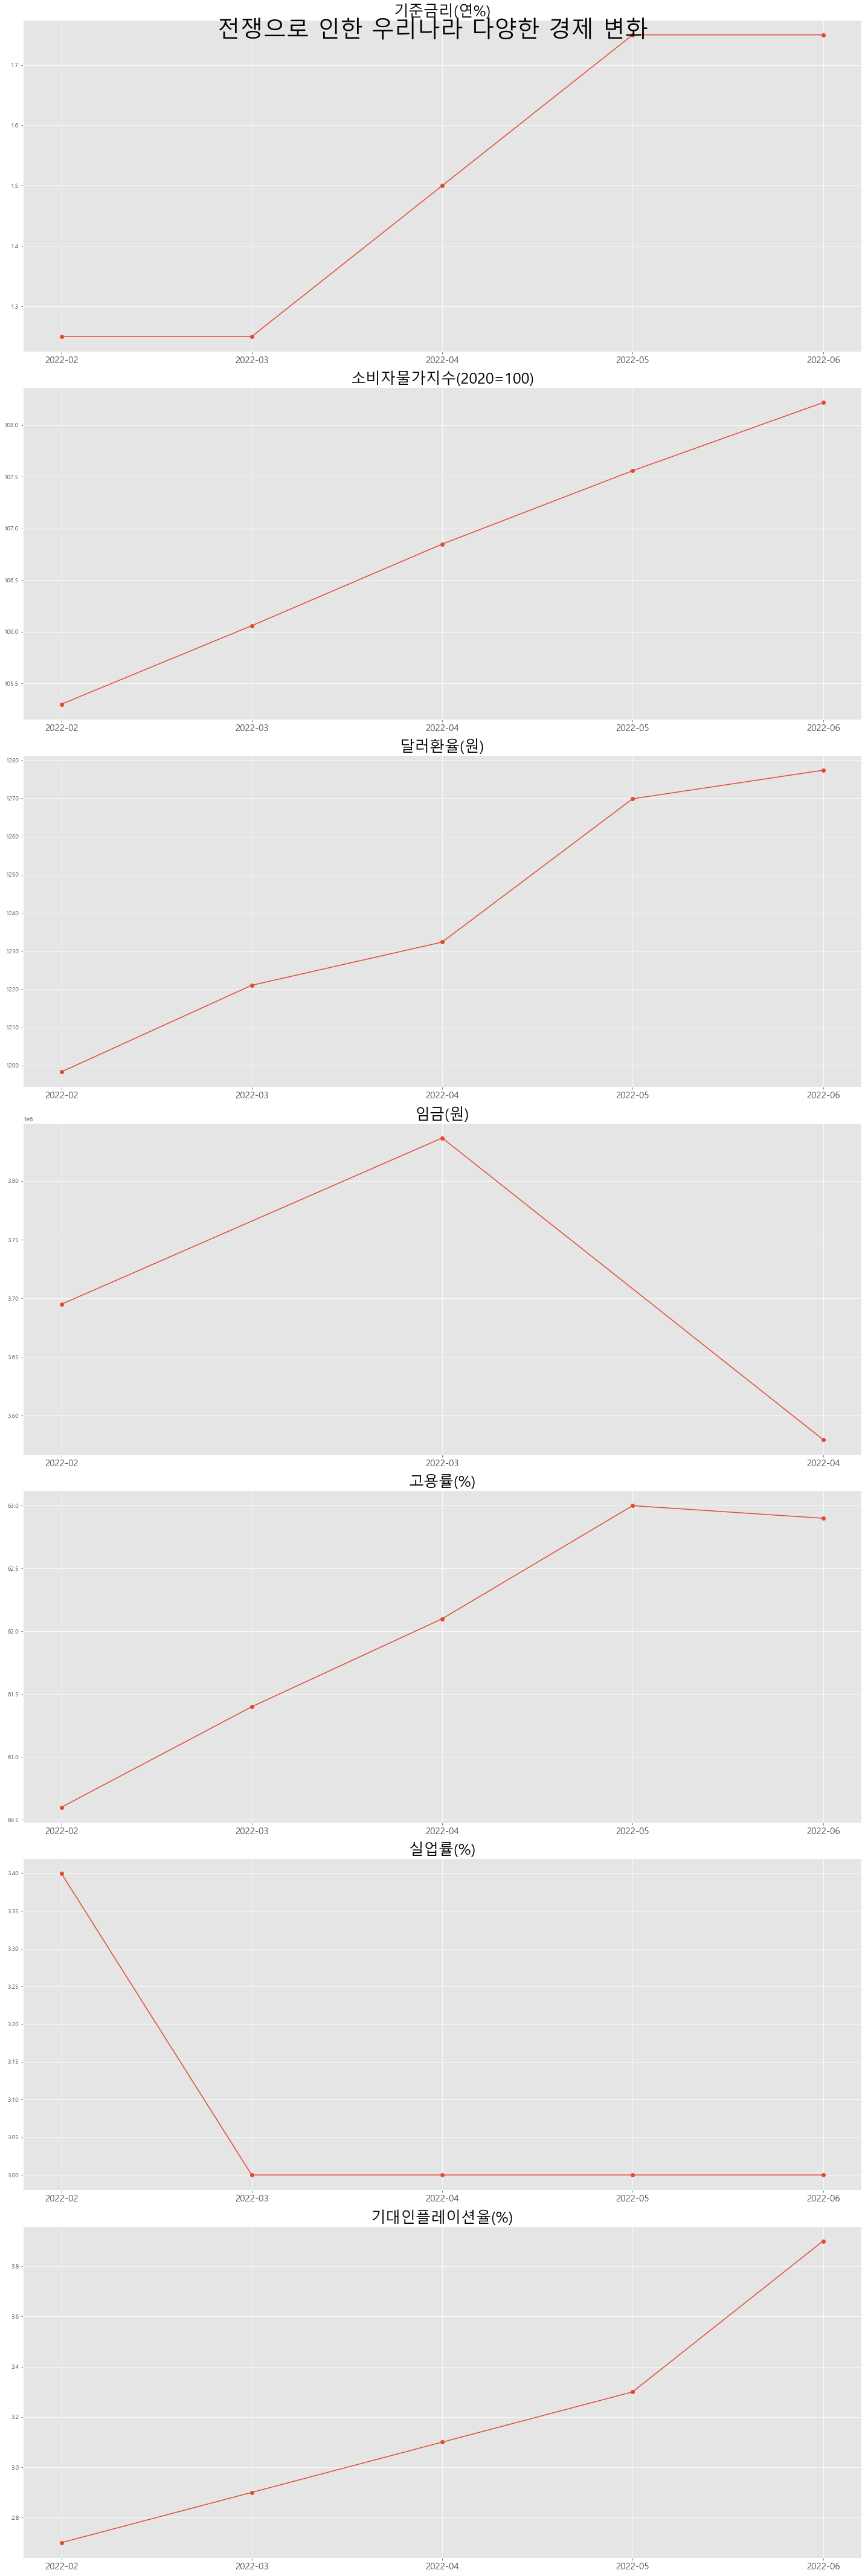

In [65]:
# 컬럼별 값에 대한 각각의 그래프 그리기
fig, axes=plt.subplots(7, 1, figsize=(20,60))
fig.suptitle('전쟁으로 인한 우리나라 다양한 경제 변화', fontsize=38 )

plt.subplot(7, 1, 1)  # 기준금리
plt.title('기준금리(연%)',fontsize=25) 
plt.plot(df_war['기준금리(연%)'], marker='o')
plt.xticks(df_war.index, fontsize=15)

plt.subplot(7, 1, 2) # 소비자물가지수
plt.title('소비자물가지수(2020=100)',fontsize=25)  
plt.plot(df_war['소비자물가지수(2020=100)'], marker='o')
plt.xticks(df_war.index, fontsize=15)

plt.subplot(7, 1, 3) # 환율
plt.title('달러환율(원)',fontsize=25)  
plt.plot(df_war['달러환율(원)'], marker='o')
plt.xticks(df_war.index, fontsize=15)

plt.subplot(7, 1, 4) # 임금
plt.title('임금(원)',fontsize=25)
plt.plot(df_war['임금(원)'], marker='o')  
plt.xticks(df_war.index[:-2], fontsize=15)

plt.subplot(7, 1, 5) #취업률
plt.title('고용률(%)',fontsize=25)
plt.plot(df_war['고용률(%)'], marker='o')  
plt.xticks(df_war.index, fontsize=15)

plt.subplot(7, 1, 6) # 실업률
plt.title('실업률(%)',fontsize=25)
plt.plot(df_war['실업률(%)'], marker='o')  
plt.xticks(df_war.index, fontsize=15)

plt.subplot(7, 1, 7) # 기대인플레이션율
plt.title('기대인플레이션율(%)',fontsize=25)
plt.plot(df_war['기대인플레이션율(%)'], marker='o')
plt.xticks(df_war.index, fontsize=15)

plt.tight_layout()
plt.show()

- 기준금리, 소비자물가지수, 달러환율, 고용률, 기대인플레이션율은 증가하는 추세입니다.
- 실업률은 감소하고 임금은 알 수 없습니다.

#### 정규화(1) (컬럼의 데이터 - 평균) / 표준편차

In [66]:
# 정규화 데이터 리스트에 저장
bb=[]
for col in df_war.columns:
    aa=[]
    if df_war.iloc[3][col]!='nan':
        for i in range(len(df_war.index)):
            aa.append(round((df_war.iloc[i][col] - df_war[col].mean()) / df_war[col].std(), 2))
        bb.append(aa)
        
    else:
        for i in range(3):
            aa.append(round((df_war.iloc[i][col] - df_war[col].mean()) / df_war[col].std(), 2))
        bb.append(aa)

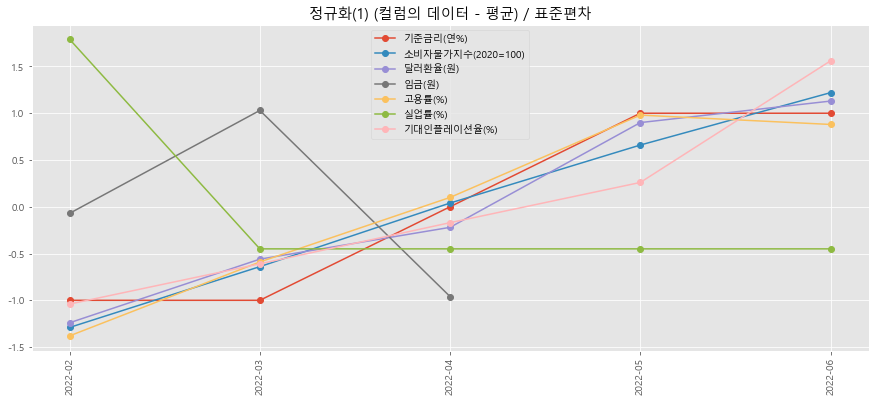

In [67]:
# 정규화 데이터 그래프 그리기
bb0=pd.Series(bb[0])
bb1=pd.Series(bb[1])
bb2=pd.Series(bb[2])
bb3=pd.Series(bb[3])
bb4=pd.Series(bb[4])
bb5=pd.Series(bb[5])
bb6=pd.Series(bb[6])

df_nor11=pd.concat([bb0,bb1,bb2,bb3,bb4,bb5,bb6],axis=1)
df_nor11.columns=df_war.columns

plt.figure(figsize=(15,6))
plt.title('정규화(1) (컬럼의 데이터 - 평균) / 표준편차')
for i in range(0,7):
    plt.rcParams['axes.unicode_minus']=False
    plt.plot(df_war.index,bb[i],marker='o')
    plt.xticks(df_war.index, rotation=90)
    plt.legend(df_nor11.columns)
plt.show()

## 정규화 (2) (컬럼의 데이터 - 최소값) / (최대값 - 최소값)

In [68]:
# 정규화 데이터 리스트에 저장
dd=[]
for col in df_war.columns:
    cc=[]
    if df_war.iloc[3][col]!='nan':
        for i in range(len(df_war.index)):
            cc.append(round((df_war.iloc[i][col] - df_war[col].min()) / (df_war[col].max() - df_war[col].min()), 2))
        dd.append(cc)
        
    else:
        for i in range(3):
            cc.append(round((df_war.iloc[i][col] - df_war[col].min()) / (df_war[col].max() - df_war[col].min()), 2))
        dd.append(cc)

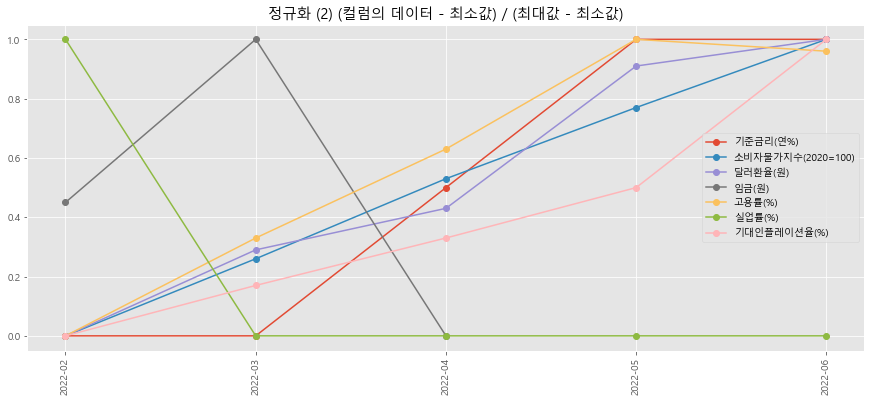

In [69]:
# 정규화 데이터 그래프 그리기
dd0=pd.Series(dd[0])
dd1=pd.Series(dd[1])
dd2=pd.Series(dd[2])
dd3=pd.Series(dd[3])
dd4=pd.Series(dd[4])
dd5=pd.Series(dd[5])
dd6=pd.Series(dd[6])

df_nor22=pd.concat([dd0,dd1,dd2,dd3,dd4,dd5,dd6],axis=1)
df_nor22.columns=df_war.columns

plt.figure(figsize=(15,6))
plt.title('정규화 (2) (컬럼의 데이터 - 최소값) / (최대값 - 최소값)')
for i in range(0,7):
    plt.rcParams['axes.unicode_minus']=False
    plt.plot(df_war.index,dd[i],marker='o')
    plt.xticks(df_war.index, rotation=90)
    plt.legend(df_nor22.columns)
plt.show()

- 3가지 정규화를 한 후 종합적인 결과입니다.
- 기준금리, 소비자물가지수, 환율, 고용률, 기대인플레이션율은 증가하는 추세이며
- 실업률은 감소하고 임금은 알 수 없습니다.

#### 정규화(3) 컬럼의 데이터 / 최대값

In [70]:
# 정규화 데이터 리스트에 저장
ff=[]
for col in df_war.columns:
    ee=[]
    if df_war.iloc[3][col]!='nan':
        for i in range(len(df_war.index)):
            ee.append(round(df_war.iloc[i][col] / df_war[col].max(), 2))
        ff.append(ee)
        
    else:
        for i in range(3):
            ee.append(round(df_war.iloc[i][col] / df_war[col].max(), 2))
        ff.append(ee)

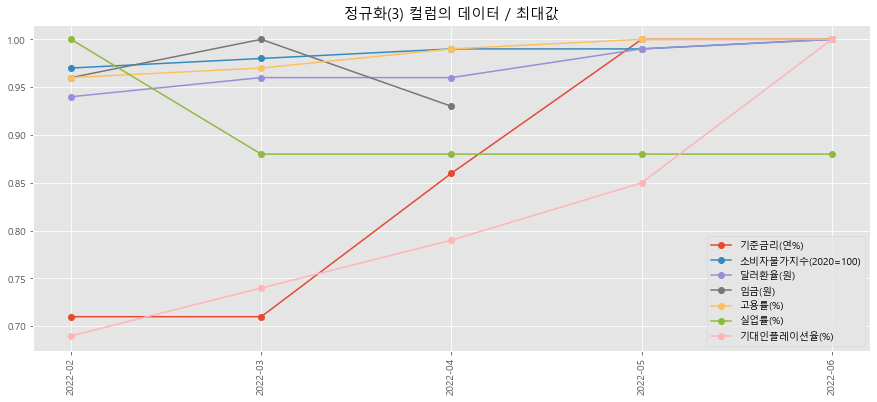

In [71]:
# 정규화 데이터 그래프 그리기
ff0=pd.Series(ff[0])
ff1=pd.Series(ff[1])
ff2=pd.Series(ff[2])
ff3=pd.Series(ff[3])
ff4=pd.Series(ff[4])
ff5=pd.Series(ff[5])
ff6=pd.Series(ff[6])

df_nor33=pd.concat([ff0,ff1,ff2,ff3,ff4,ff5,ff6],axis=1)
df_nor33.columns=df_war.columns

plt.figure(figsize=(15,6))
plt.title('정규화(3) 컬럼의 데이터 / 최대값')
for i in range(0,7):
    plt.rcParams['axes.unicode_minus']=False
    plt.plot(df_war.index,ff[i],marker='o')
    plt.xticks(df_war.index, rotation=90)
    plt.legend(df_nor33.columns)
plt.show()

In [72]:
# 전쟁 이후 2022-02 ~ 2022-05 상관계수
df_war.corr()

,기준금리(연%),소비자물가지수(2020=100),달러환율(원),임금(원),고용률(%),실업률(%),기대인플레이션율(%)
기준금리(연%),1.000000,0.951554,0.959246,-0.834861,0.958373,-0.559017,0.868744
소비자물가지수(2020=100),0.951554,1.000000,0.981276,-0.457744,0.970666,-0.721121,0.952339
달러환율(원),0.959246,0.981276,1.000000,-0.269999,0.976625,-0.695318,0.918961
임금(원),-0.834861,-0.457744,-0.269999,1.000000,-0.413059,-0.059282,-0.447781
고용률(%),0.958373,0.970666,0.976625,-0.413059,1.000000,-0.769277,0.853929
실업률(%),-0.559017,-0.721121,-0.695318,-0.059282,-0.769277,1.000000,-0.582772
기대인플레이션율(%),0.868744,0.952339,0.918961,-0.447781,0.853929,-0.582772,1.000000


# <span style='color:Blue'> 최종결론   </span>
- 전쟁 기간동안 예상대로 기준금리, 소비자물가지수, 달러환율, 기대인플레이션율은 강력한 양의 관계를 가지는 것을 확인하였습니다.
- 공공이 주도해서 만든 '보건업 및 사회복지서비스업' 취업자가 전년 동월 대비 25만1000명 증가하며 전체 취업자 증가했고 제조업도 10만명 증가했습니다. 이로 인한 고용률의 증가이므로 전쟁과는 연관있어 보이지 않습니다.
- 전쟁 기간동안 실업률은 모든 데이터들과 높은 음의 상관 관계를 가지는 것을 알 수 있고, 예상과 달리 경제 상황이 좋지 못하면 실업률이 떨어지는 것을 알 수 있습니다.
- 전쟁 기간동안 기준금리와 임금이 강력한 음의 관계를 가지는 것을 알 수 있고 전체적으로 임금은 음의 관계를 가지지만 크게 관련이 없는 것으로 생각됩니다.
- 전망 예상
    - 미국이 주도하는 러시아 원유 가격상한제 동참하게 되면서 가격상한제가 국제 유가 및 소비자 물가 안정에 기여하지 않을까 생각합니다.